## CYOA choose your own classifier

#### ADABOOST
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [1]:
import random
def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
import warnings
warnings.filterwarnings("ignore")
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]
    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade") 

XBBOOST Tree Accuracy  92.4 %


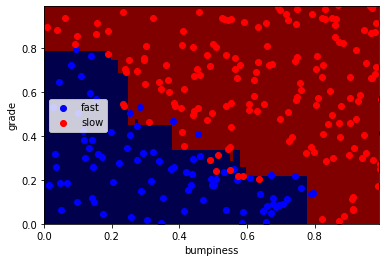

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()

clf = AdaBoostClassifier()
clf.fit(features_train,labels_train)
%matplotlib inline
#### grader code, do not modify below this line
print ("XBBOOST Tree Accuracy " , accuracy_score(clf.predict(features_test),labels_test)*100 ,"%")
prettyPicture(clf, features_test, labels_test)

XBBOOST Tree Accuracy  91.2 %


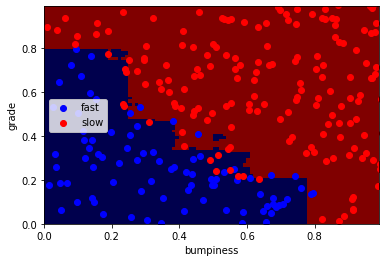

In [3]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()

clf = RandomForestClassifier()
clf.fit(features_train,labels_train)
%matplotlib inline
#### grader code, do not modify below this line
print ("XBBOOST Tree Accuracy " , accuracy_score(clf.predict(features_test),labels_test)*100 ,"%")
prettyPicture(clf, features_test, labels_test)

In [3]:
import pickle
import _pickle as cPickle
import numpy

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

def preprocess(words_file = "../tools/word_data.pkl", authors_file="../tools/email_authors.pkl",percentile=10):
    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.1, random_state=42)

    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)
    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    print("Applying percentile %s"%percentile)
    selector = SelectPercentile(f_classif, percentile=percentile)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()
    ### info on the data
    print("No of Features %s"%len(features_train_transformed[0]))
    print ("no. of Chris training emails:", sum(labels_train))
    print ("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    return features_train_transformed, features_test_transformed, labels_train, labels_test

In [4]:
import sys
from time import time
sys.path.append("../tools/")
features_train, features_test, labels_train, labels_test = preprocess()
from sklearn.metrics import accuracy_score
clf_r = RandomForestClassifier()

t0 = time()
clf_r.fit(features_train, labels_train)
print ("training time: %s s"% round(time()-t0, 3))
pred = clf_r.predict(features_test) 
### use the trained classifier to predict labels for the test features
print ("RandomForestClassifier Accuracy " , accuracy_score(pred,labels_test)*100 ,"%")

Applying percentile 10
No of Features 3785
no. of Chris training emails: 7936
no. of Sara training emails: 7884


NameError: name 'RandomForestClassifier' is not defined

In [5]:
import sys
from time import time
sys.path.append("../tools/")
features_train, features_test, labels_train, labels_test = preprocess()

from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier()
t0 = time()
clf.fit(features_train, labels_train)
print ("training time: %s s"% round(time()-t0, 3))
pred = clf.predict(features_test) 
### use the trained classifier to predict labels for the test features
print ("AdaBoostClassifier Accuracy " , accuracy_score(pred,labels_test)*100 ,"%")

Applying percentile 10
No of Features 3785
no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 91.658 s
AdaBoostClassifier Accuracy  95.05119453924915 %
